In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [3]:
df=pd.read_csv('Money Laundering.csv')
MoneyL_dataset = df.sample(n=75000, random_state=42)
MoneyL_dataset.reset_index(inplace=True)
MoneyL_dataset.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [5]:
MoneyL_dataset=MoneyL_dataset.drop("index",axis=1)

In [6]:
MoneyL_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [7]:
MoneyL_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            75000 non-null  int64  
 1   type            75000 non-null  object 
 2   amount          75000 non-null  float64
 3   nameOrig        75000 non-null  object 
 4   oldbalanceOrg   75000 non-null  float64
 5   newbalanceOrig  75000 non-null  float64
 6   nameDest        75000 non-null  object 
 7   oldbalanceDest  75000 non-null  float64
 8   newbalanceDest  75000 non-null  float64
 9   isFraud         75000 non-null  int64  
 10  isFlaggedFraud  75000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 6.3+ MB


In [8]:
print("The Number of Rows (Obeservation) :" ,MoneyL_dataset.shape[0],'\n',"The number of Columns (variables) :", MoneyL_dataset.shape[1])

The Number of Rows (Obeservation) : 75000 
 The number of Columns (variables) : 11


In [9]:
MoneyL_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,75000.0,2.437299e+02,1.428553e+02,1.00,156.0000,239.000,3.350000e+02,7.360000e+02
amount,75000.0,1.794147e+05,5.373701e+05,0.92,13482.4075,76045.255,2.098748e+05,3.697390e+07
oldbalanceOrg,75000.0,8.383823e+05,2.914083e+06,0.00,0.0000,13695.000,1.068500e+05,3.359321e+07
newbalanceOrig,75000.0,8.602226e+05,2.949748e+06,0.00,0.0000,0.000,1.467099e+05,3.388709e+07
oldbalanceDest,75000.0,1.095766e+06,3.203505e+06,0.00,0.0000,141269.235,9.593808e+05,2.362896e+08
newbalanceDest,75000.0,1.219350e+06,3.444468e+06,0.00,0.0000,220880.095,1.125103e+06,2.724047e+08
isFraud,75000.0,1.386667e-03,3.721239e-02,0.00,0.0000,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,75000.0,1.333333e-05,3.651484e-03,0.00,0.0000,0.000,0.000000e+00,1.000000e+00


In [10]:
MoneyL_dataset_sub=MoneyL_dataset

## EDA

In [13]:
# Converting "Type" nominal col. to integer
mapping={'PAYMENT':0, 'TRANSFER':1,'CASH_OUT':2,'DEBIT':3,'CASH_IN':4}
MoneyL_dataset_sub["type"]=MoneyL_dataset_sub["type"].replace(mapping)

In [14]:
MoneyL_dataset_sub.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,4,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,0,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,4,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,1,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,4,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [15]:
#Dropping Nominal columns
MoneyL_dataset_sub1=MoneyL_dataset_sub.drop(["nameOrig","nameDest"], axis=1)

In [16]:
MoneyL_dataset_sub1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,4,330218.42,20866.00,351084.42,452419.57,122201.15,0,0
1,15,0,11647.08,30370.00,18722.92,0.00,0.00,0,0
2,10,4,152264.21,106589.00,258853.21,201303.01,49038.80,0,0
3,403,1,1551760.63,0.00,0.00,3198359.45,4750120.08,0,0
4,206,4,78172.30,2921331.58,2999503.88,415821.90,337649.60,0,0


<AxesSubplot:>

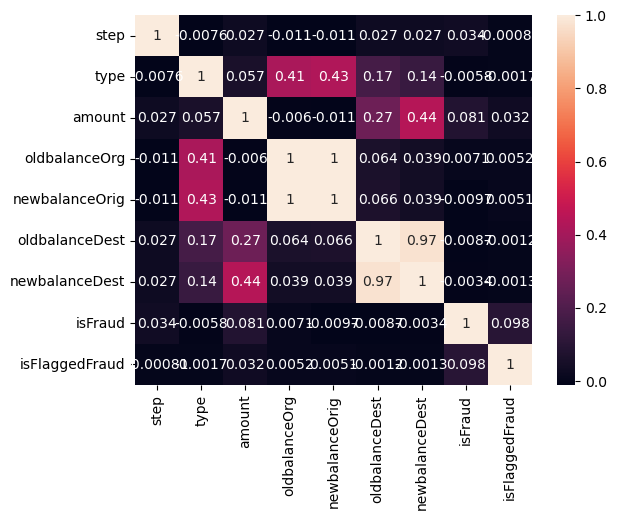

In [17]:
#Correlation
sns.heatmap(MoneyL_dataset_sub1.corr(), annot = True)

In [18]:
#Dropping highly correlated columns
MoneyL_dataset_sub1=MoneyL_dataset_sub1.drop(["oldbalanceOrg","oldbalanceDest"],axis=1)

In [19]:
MoneyL_dataset_sub1.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,278,4,330218.42,351084.42,122201.15,0,0
1,15,0,11647.08,18722.92,0.00,0,0
2,10,4,152264.21,258853.21,49038.80,0,0
3,403,1,1551760.63,0.00,4750120.08,0,0
4,206,4,78172.30,2999503.88,337649.60,0,0


In [20]:
#Handling Duplicate rows
MoneyL_dataset_sub1.duplicated().sum()

1

In [21]:
mask=MoneyL_dataset_sub1.duplicated(keep=False)
MoneyL_dataset_sub1[mask].value_counts()

step  type  amount      newbalanceOrig  newbalanceDest  isFraud  isFlaggedFraud
304   1     10000000.0  0.0             30759565.57     0        0                 2
dtype: int64

In [22]:
MoneyL_dataset_sub1=MoneyL_dataset_sub1.drop_duplicates(keep='first')

In [23]:
MoneyL_dataset_sub1.duplicated().sum()

0

In [24]:
MoneyL_dataset_sub1.isnull().sum()

step              0
type              0
amount            0
newbalanceOrig    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [25]:
MoneyL_dataset_sub1_X=MoneyL_dataset_sub1.drop("isFraud", axis=1)
MoneyL_dataset_sub1_Y=MoneyL_dataset_sub1["isFraud"]

In [26]:
# Let's check the number of outliers per columns

Q1 = MoneyL_dataset_sub1_X.quantile(0.25)
Q3 = MoneyL_dataset_sub1_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

In [27]:
((MoneyL_dataset_sub1_X > UL) | (MoneyL_dataset_sub1_X < LL)).sum()

step               1221
type                  0
amount             3985
newbalanceOrig    12444
newbalanceDest     8691
isFlaggedFraud        1
dtype: int64

## Modelling

## Random Forest 

In [28]:
# Scale the predictors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictor = pd.DataFrame(scaler.fit_transform(MoneyL_dataset_sub1_X), columns=MoneyL_dataset_sub1_X.columns)

In [29]:
scaled_predictor.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud
0,0.239900,1.545806,0.281504,-0.172608,-0.318567,-0.003652
1,-1.601127,-1.136220,-0.312655,-0.285283,-0.354062,-0.003652
2,-1.636127,1.545806,-0.050393,-0.203875,-0.339818,-0.003652
3,1.114912,-0.465713,2.559769,-0.291630,1.025672,-0.003652
4,-0.264108,1.545806,-0.188580,0.725239,-0.255987,-0.003652


In [30]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(scaled_predictor,MoneyL_dataset_sub1_Y,test_size=0.3,random_state=42)

In [32]:
no_feat=len(X2_train.columns)

In [33]:
# max_depth can be square root of number of features(col.) in the dataset
depth=int(np.log2(no_feat))
depth

2

In [34]:
## Importing Random Forest Classifier from the sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

## Initializing the Random Forest Classifier with max_dept and n_estimators

modelRF = RandomForestClassifier(max_depth=depth, n_estimators=100,oob_score=True, random_state=101)
modelRF.fit(X2_train, Y2_train)

RandomForestClassifier(max_depth=2, oob_score=True, random_state=101)

In [35]:
pred_Y_test= modelRF.predict(X2_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(metrics.classification_report(Y2_test, pred_Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22464
           1       0.00      0.00      0.00        36

    accuracy                           1.00     22500
   macro avg       0.50      0.50      0.50     22500
weighted avg       1.00      1.00      1.00     22500



In [40]:
auc = metrics.roc_auc_score(Y2_test, modelRF.predict_proba(X2_test)[:,1])
auc

0.9496806000712251

In [45]:
## Configuring parameters and values for searched
from sklearn.model_selection import GridSearchCV

params = [{'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150]}]

modelRF = RandomForestClassifier(random_state=101)

## Configuring search with the tunable parameters

modelCV = GridSearchCV(modelRF, params, cv=10, scoring='roc_auc')

## Fitting the training set

modelCV.fit(X2_train, Y2_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [5, 10, 15],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [46]:
modelCV.best_score_

0.9623313245562111

In [47]:
modelCV.best_params_

{'max_depth': 5, 'n_estimators': 150}

## Building the model with Best Parameter

In [49]:
## Initializing the Random Forest Model with the optimal values

model_bp = RandomForestClassifier(max_depth= 5, n_estimators=150,  oob_score=True, random_state=101)

## Fitting the model with the training set
# oob_score=True
# class balanced

model_bp.fit(X2_train, Y2_train)

RandomForestClassifier(max_depth=5, n_estimators=150, oob_score=True,
                       random_state=101)

In [50]:
pred_y_RF = model_bp.predict(X2_test)

In [52]:
print(metrics.classification_report(Y2_test, pred_y_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22464
           1       1.00      0.11      0.20        36

    accuracy                           1.00     22500
   macro avg       1.00      0.56      0.60     22500
weighted avg       1.00      1.00      1.00     22500



In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(Y2_test, model_bp.predict_proba(X2_test)[:,1])

In [55]:
roc_auc = metrics.auc(fpr, tpr)

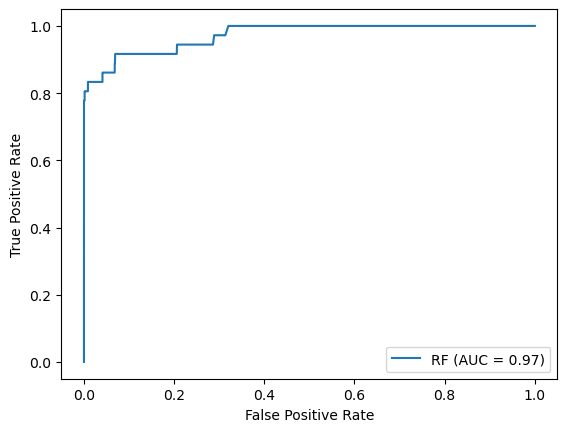

In [61]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='RF')
display.plot()
plt.show()


## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
MoneyL_dataset_sub2_X = pd.DataFrame(scaled_predictor,columns=scaled_predictor.columns)

In [60]:
accuracy_rate = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_predictor,MoneyL_dataset_sub1_Y,cv=10) #Cv here is K' in notes in cross validation and cv=10 
                                                                #is industry standard
    accuracy_rate.append(score.mean())

In [62]:
accuracy_rate

[0.9984666453304886,
 0.9986399839978665,
 0.9986533191092144,
 0.9985999822198515,
 0.9986133173311998,
 0.9985999822198515,
 0.9985999822198515,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848,
 0.9986133155531848]

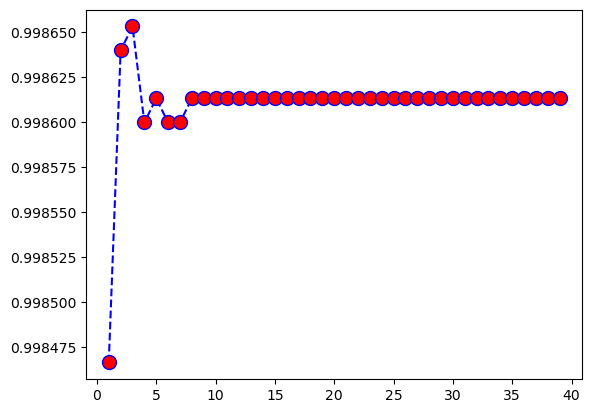

In [64]:
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [68]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X2_train,Y2_train)


KNeighborsClassifier(n_neighbors=9)

In [69]:
pred_Knn = knn.predict(X2_test)

In [70]:
print(classification_report(Y2_test,pred_Knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22464
           1       0.00      0.00      0.00        36

    accuracy                           1.00     22500
   macro avg       0.50      0.50      0.50     22500
weighted avg       1.00      1.00      1.00     22500



## Ada Boost

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
## Importing AdaBoost classifier


from sklearn.ensemble import AdaBoostClassifier

## Initializing Decision Tree Classifier to use as base classifier

dt_base_model = DecisionTreeClassifier() #here any classifier can be used like KNN, logistic regresssion, random forest

# Initializing AdaBoost classifier with 200 classifers

ada_model = AdaBoostClassifier(dt_base_model, n_estimators=200, random_state=101)

# Fitting AdaBoost model to training set

ada_model.fit(X2_train, Y2_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                   random_state=101)

In [73]:
pred_y_Ada = ada_model.predict(X2_test)

In [74]:
print(metrics.classification_report(Y2_test, pred_y_Ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22464
           1       0.74      0.47      0.58        36

    accuracy                           1.00     22500
   macro avg       0.87      0.74      0.79     22500
weighted avg       1.00      1.00      1.00     22500



In [75]:
print(metrics.accuracy_score(Y2_test, pred_y_Ada))

0.9988888888888889


In [76]:
auc_ada = metrics.roc_auc_score(Y2_test, ada_model.predict_proba(X2_test)[:,1])
auc_ada

0.7359775641025642

## Gradient Boosting

In [77]:
## Importing Gradient Boosting classifier

from sklearn.ensemble import GradientBoostingClassifier



In [78]:
model_gb = GradientBoostingClassifier(n_estimators=500, max_depth=depth, random_state=101) # here only gradient boossting 
#can be used

## Fitting gradient boosting model to training set

model_gb.fit(X2_train, Y2_train)

GradientBoostingClassifier(max_depth=2, n_estimators=500, random_state=101)

In [79]:
pred_y_GB = model_gb.predict(X2_test)

In [80]:
print(metrics.classification_report(Y2_test, pred_y_GB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22464
           1       0.85      0.31      0.45        36

    accuracy                           1.00     22500
   macro avg       0.92      0.65      0.72     22500
weighted avg       1.00      1.00      1.00     22500



In [81]:
scaled_predictor.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud
0,0.239900,1.545806,0.281504,-0.172608,-0.318567,-0.003652
1,-1.601127,-1.136220,-0.312655,-0.285283,-0.354062,-0.003652
2,-1.636127,1.545806,-0.050393,-0.203875,-0.339818,-0.003652
3,1.114912,-0.465713,2.559769,-0.291630,1.025672,-0.003652
4,-0.264108,1.545806,-0.188580,0.725239,-0.255987,-0.003652


In [82]:
print(metrics.accuracy_score(Y2_test, pred_y_GB))

0.9988
